In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'], index_col='date')
# Handle missing values
df.dropna(inplace=True)

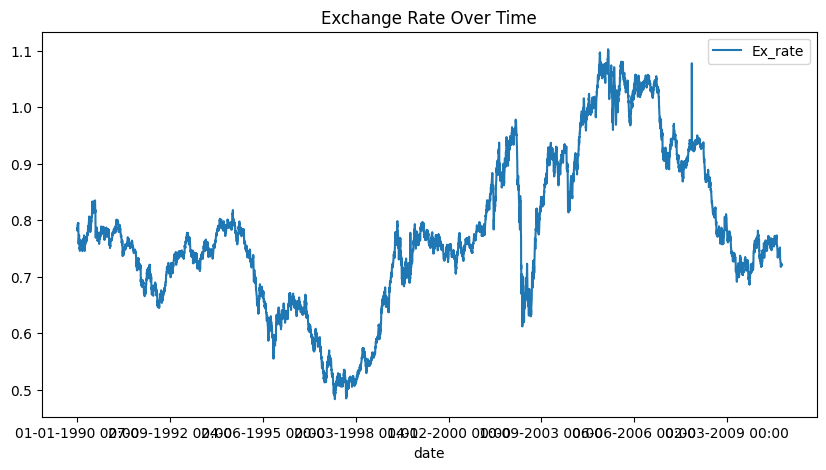

In [4]:
# Plot the time series
df.plot(figsize=(10, 5), title='Exchange Rate Over Time', linestyle='solid')
plt.show()

In [5]:
# Check stationarity
# Stationary if p-value < 0.05
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1] < 0.05

In [6]:
is_stationary = check_stationarity(df.iloc[:, 0])

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


In [7]:
# Differencing if needed
diff_series = df.diff().dropna() if not is_stationary else df
diff_series

,Ex_rate
date,
02-01-1990 00:00,-0.003700
03-01-1990 00:00,0.004900
04-01-1990 00:00,-0.000700
05-01-1990 00:00,-0.001100
06-01-1990 00:00,0.001700
...,...
06-10-2010 00:00,-0.000207
07-10-2010 00:00,0.003345
08-10-2010 00:00,0.001358


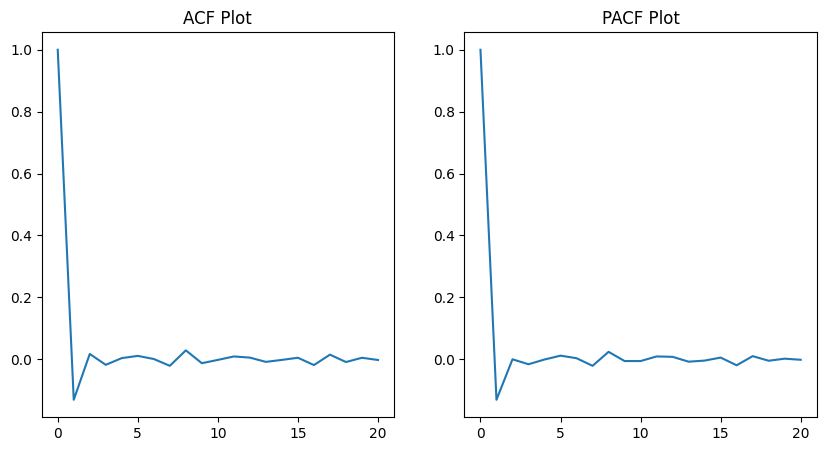

In [8]:
# ACF and PACF plots
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(acf(diff_series.iloc[:, 0], nlags=20), linestyle='solid')
plt.title('ACF Plot')
plt.subplot(122)
plt.plot(pacf(diff_series.iloc[:, 0], nlags=20), linestyle='solid')
plt.title('PACF Plot')
plt.show()

In [9]:
# Fit ARIMA model
p, d, q = 1, 1, 1  # Chosen based on ACF/PACF analysis
model_arima = ARIMA(df, order=(p, d, q))
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


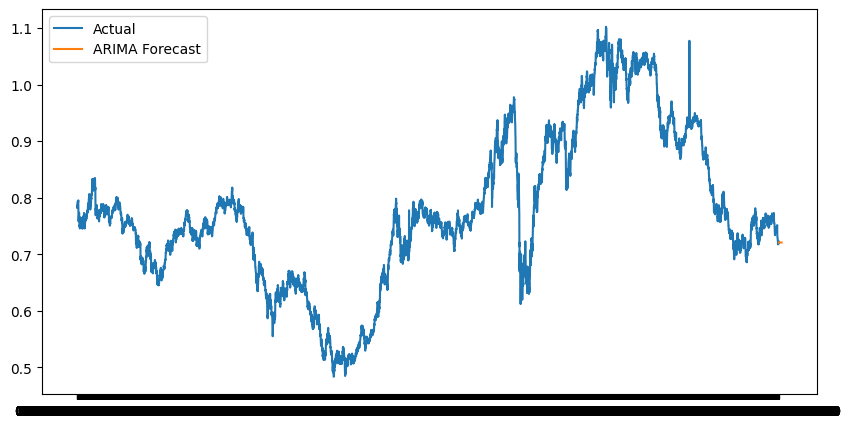

In [10]:
# Forecast with ARIMA
forecast_arima = model_arima_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(df, label='Actual', linestyle='solid')
plt.plot(forecast_arima, label='ARIMA Forecast', linestyle='solid')
plt.legend()
plt.show()

In [11]:
# Fit Exponential Smoothing model
model_es = ExponentialSmoothing(df, trend='add', seasonal=None).fit()
forecast_es = model_es.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


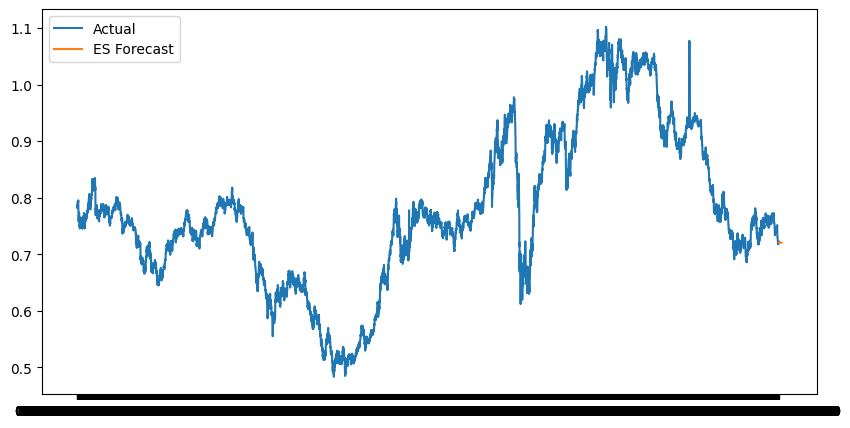

In [12]:
# Plot Exponential Smoothing forecast
plt.figure(figsize=(10, 5))
plt.plot(df, label='Actual', linestyle='solid')
plt.plot(forecast_es, label='ES Forecast', linestyle='solid')
plt.legend()
plt.show()

In [13]:
# Evaluate Models
actual = df.iloc[-30:, 0]
mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima))
mae_es = mean_absolute_error(actual, forecast_es)
rmse_es = np.sqrt(mean_squared_error(actual, forecast_es))

In [14]:
print(f'ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}')
print(f'Exp Smoothing MAE: {mae_es}, RMSE: {rmse_es}')

ARIMA MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exp Smoothing MAE: 0.012755756156713368, RMSE: 0.017005229952751045
